<a href="https://colab.research.google.com/github/azizkhani/DeepLearningCodes/blob/master/binary_classification_teach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 85kB/s 
     |████████████████████████████████| 3.8MB 36.6MB/s 
     |████████████████████████████████| 450kB 51.5MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [3]:
m = 200
x, y = datasets.make_classification(n_samples=m,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    n_repeated=0,
                                    n_classes=2,
                                    n_clusters_per_class=1,
                                    random_state=100)
y = y.reshape(-1, 1)
print('x.shape: ', x.shape)
print('y.shape: ', y.shape)

x.shape:  (200, 2)
y.shape:  (200, 1)


In [4]:
x_train.dtype

NameError: ignored

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print('x_train.shape: ', x_train.shape, 'y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape, 'y_test.shape: ', y_test.shape)

x_train.shape:  (150, 2) y_train.shape:  (150, 1)
x_test.shape:  (50, 2) y_test.shape:  (50, 1)


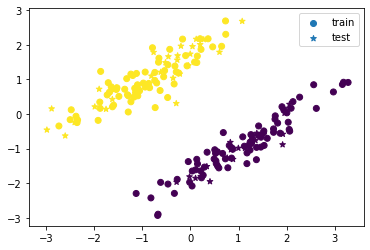

In [6]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train.reshape(-1), marker='o', label='train');
plt.scatter(x_test[:,0], x_test[:,1], c=y_test.reshape(-1), marker='*', label='test');
plt.legend();

### Hyper-paramters

In [0]:
n_inputs = x_train.shape[1]
m = x_train.shape[0]
n_outputs = 1
lr = 0.01
epochs = 500

### Defining Variables

In [8]:
w = tf.Variable(tf.zeros(shape=(2, 1), dtype=tf.float64), dtype=tf.float64)
b = tf.Variable(0, dtype=tf.float64)
print("w.shape: ",w.shape)
print("b.shape: ",b.shape)

w.shape:  (2, 1)
b.shape:  ()


In [0]:
def model(x):
    z = tf.matmul(x, w) + b 
    y_pred = tf.sigmoid(z)
    return y_pred

In [10]:
y_pred = model(x_train)
y_pred[:5]

<tf.Tensor: id=26, shape=(5, 1), dtype=float64, numpy=
array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])>

In [11]:
tf.__version__

'2.0.0'

In [0]:
def loss(y_true, y_pred):
    l = -(y_true * tf.math.log(y_pred) + (1- y_true) *
          tf.math.log(1-y_pred))
    return tf.reduce_mean(l)

In [13]:
loss(y_train, y_pred)

<tf.Tensor: id=38, shape=(), dtype=float64, numpy=0.6931471805599447>

In [0]:
optimizer=tf.optimizers.Adam(learning_rate=lr)

In [0]:
def accuracy (y_pred,y_true)
  y_pred=tf.round(y_pred)
  compare=tf.equal(y_pred,y_true)
  tf.math.count_nonzero(compare)
  return 

In [0]:
def gradient_descent(x_train, y_train):
    with tf.GradientTape(persistent=True) as tape:
        y_pred = model(x_train)
        loss_v = loss(y_train, y_pred)
    # dw = tape.gradient(loss_v, w)
    # db = tape.gradient(loss_v, b)
    # del tape
    grads=tape.gradient(loss_v,[w,b])
    optimizer.apply_gradients(zip(grads,[w,b]))
    #w.assign_sub(lr * dw)
    # b.assign(b - lr * db)
    return w, b, loss_v

In [22]:
for epoch in range(epochs):
    w, b, loss_v  = gradient_descent(x_train, y_train)
    print('epoch: ', epoch, 'loss: ', loss_v.numpy())

epoch:  0 loss:  0.12319955733419649
epoch:  1 loss:  0.12299004988667782
epoch:  2 loss:  0.1227809863095913
epoch:  3 loss:  0.12257237454952974
epoch:  4 loss:  0.12236422084636224
epoch:  5 loss:  0.12215653043101862
epoch:  6 loss:  0.12194930758365445
epoch:  7 loss:  0.12174255558169365
epoch:  8 loss:  0.1215362766245948
epoch:  9 loss:  0.12133047176481722
epoch:  10 loss:  0.12112514086320726
epoch:  11 loss:  0.12092028258453685
epoch:  12 loss:  0.12071589444756195
epoch:  13 loss:  0.120511972941136
epoch:  14 loss:  0.12030851371243625
epoch:  15 loss:  0.12010551182498995
epoch:  16 loss:  0.11990296207373137
epoch:  17 loss:  0.1197008593336708
epoch:  18 loss:  0.11949919891049471
epoch:  19 loss:  0.11929797685801184
epoch:  20 loss:  0.11909719023017037
epoch:  21 loss:  0.1188968372440127
epoch:  22 loss:  0.11869691734234039
epoch:  23 loss:  0.11849743115805597
epoch:  24 loss:  0.11829838039332567
epoch:  25 loss:  0.11809976763409309
epoch:  26 loss:  0.11790159

In [0]:
w1, w2 = w.numpy()

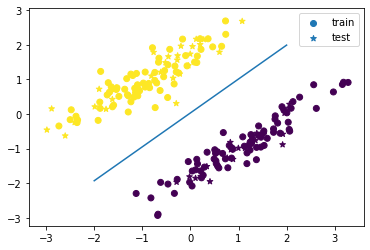

In [17]:
x1 = np.linspace(-2,2,500)
x2 = -w1/w2*x1 - b/w2
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train.reshape(-1), marker='o', label='train');
plt.scatter(x_test[:,0], x_test[:,1], c=y_test.reshape(-1), marker='*', label='test');
plt.legend();
plt.plot(x1, x2);

*:)*